### Ria Ann De la Cruz | BS in Computer Science IV

In [655]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [656]:
### Load the data ###
data = pd.read_csv("Lec2-Linear Regression\Advertising.csv", index_col = 0)
print("Size of the data:", data.shape)
data.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Standardized the data and add bias (1)
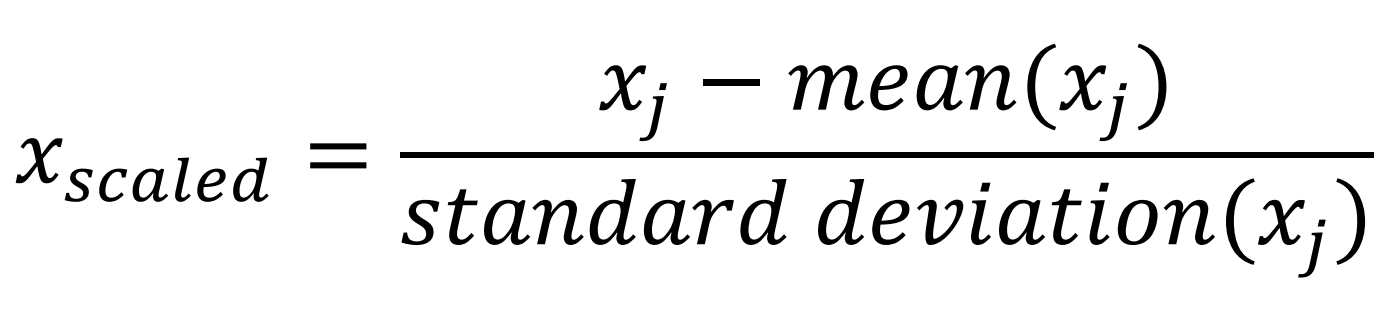

In [709]:
X = (data-np.mean(data))/np.std(data)
#Seperating the depended and independent variables
x = X.drop("Sales", axis = 1)
y = X["Sales"]
x.insert(0, 'bias', [1]*len(X))
x

,bias,TV,Radio,Newspaper
1,1,0.969852,0.981522,1.778945
2,1,-1.197376,1.082808,0.669579
3,1,-1.516155,1.528463,1.783549
4,1,0.052050,1.217855,1.286405
5,1,0.394182,-0.841614,1.281802
...,...,...,...,...
196,1,-1.270941,-1.321031,-0.771217
197,1,-0.617035,-1.240003,-1.033598
198,1,0.349810,-0.942899,-1.111852
199,1,1.594565,1.265121,1.640850


#### Divide the dataset into training and testing, with 0.75 and 0.25 ratio, respectively

In [658]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


#### Initializing Weights: Creating a vector init_w

In [659]:
init_w = np.array([0]*4)
init_w

array([0, 0, 0, 0])

#### predicted y_hat function
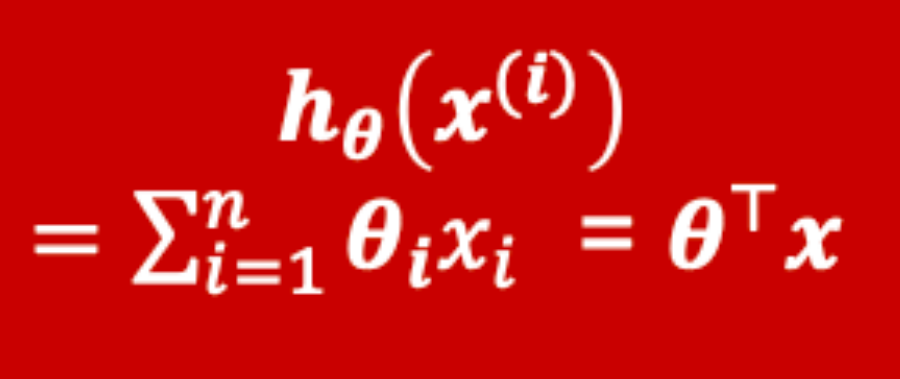

In [706]:
#creating fuction for predictive y_hat
def y_hat(x, w):
    return np.dot(x,w)
y_hat(x_train, init_w)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Computing the cost using 
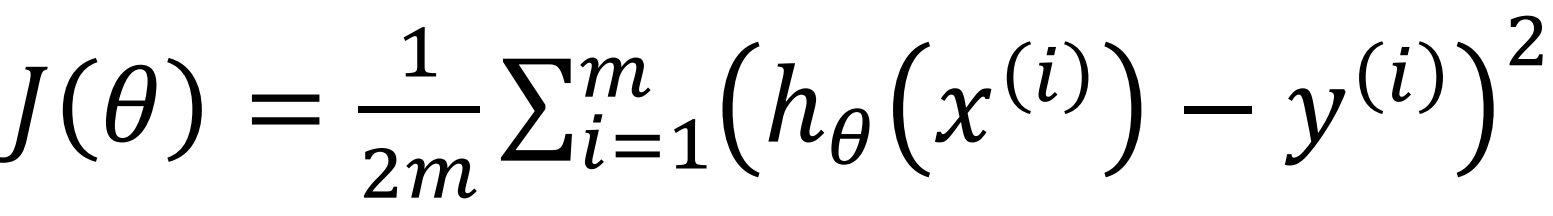

In [707]:
#Creating a compute cost function
def Compute_cost(y_hat,y):
    m = x.shape[0]   #initializing value of m
    error = y_hat - y    #predive y_hat - actual y
    RSS = np.sum(np.power(error,2)) #total sum of variable error getting squared
    return RSS/(2*m)   #returning value for cost function

In [708]:
#Cost function with weight equal to 0
Compute_cost(y_hat(x_train,init_w),y_train)

0.37187362055546297

#### Getting the cost gradient

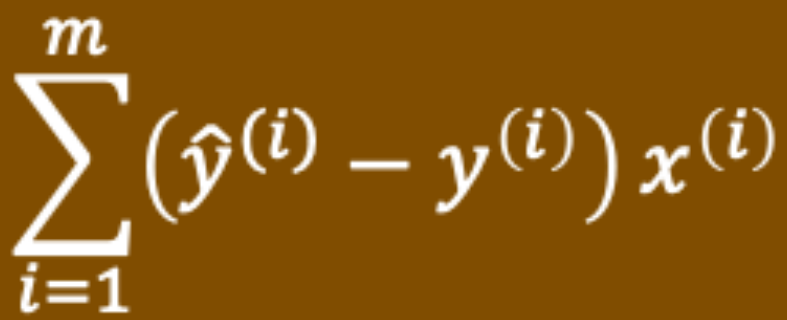

In [702]:
def compute_gradients(y,x):
    gradients = np.dot(x.T,y)   #Getting the total sum of y multiplied by x
    return gradients

#### Calculating the minimum gradient descent
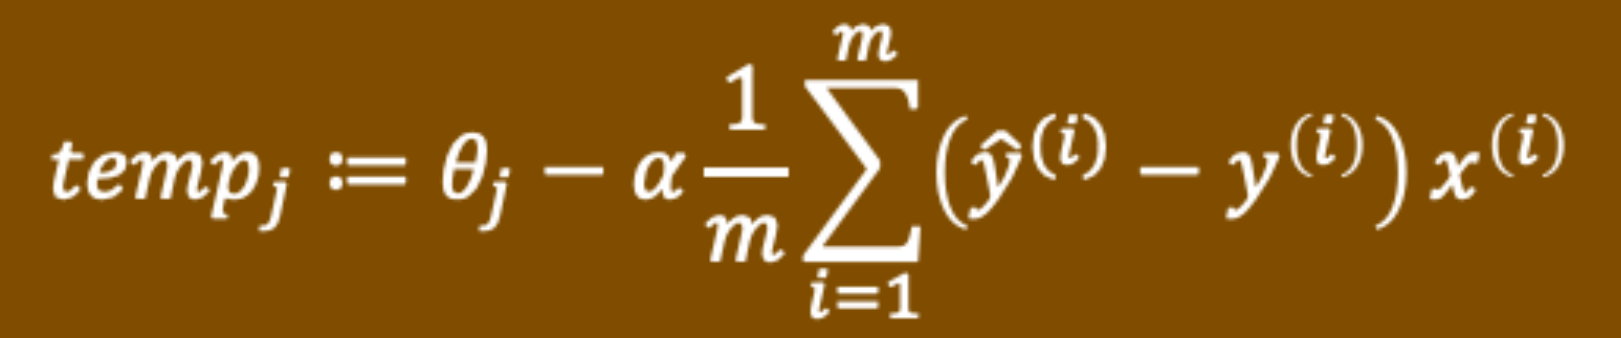

In [703]:
def grad_descent(w, x, y, iterations, lr):
    m = x.shape[0]
    costs = []
    for _ in range(iterations):
        p = y_hat(x,w)-y                    #Getting the value of predictive y - actual y
        cost = Compute_cost(p,y)            #Computing the latest cost (calling cost function)
        costs.append(cost)                  #adding latest cost to the list
        gradients = compute_gradients(p,x)  #computing the latest gradients
        w = w - (lr * gradients) / m        #updating weights 
    return w, costs

#### Getting the weight and cost of the train and test set
Iteration: 5
Learning Rate: 0.01

In [704]:
#Getting the list of updated weight and value of cost function of train set
w_train, cost_train = grad_descent(init_w, x_train, y_train, 5, 0.01)  
#Getting the list of updated weight and value of cost function of test set
w_test, cost_test = grad_descent(init_w, x_test, y_test, 5, 0.01)

#### Printing out the most latest train weights

In [705]:
w_train

array([0.00259761, 0.03725616, 0.02856369, 0.0105459 ])

#### Printing out the five iterated values of train set cost

In [667]:
cost_train

[1.4874944822218519,
 1.472956765552632,
 1.4586658466955926,
 1.4446169262150346,
 1.4308053080406926]

#### Plot train set cost

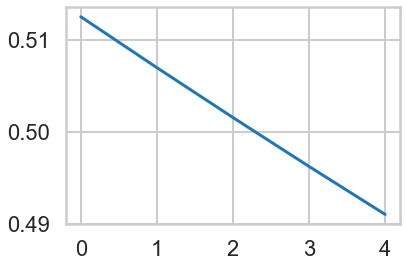

In [668]:
plt.plot(cost)

#### Printing out the most latest test weights

In [669]:
w_test

array([-0.00777769,  0.04135474,  0.02677785,  0.01212777])

#### Printing out the five iterated values of test set cost

In [670]:
cost_test

[0.5125055177781488,
 0.5069683855156041,
 0.5015404644212534,
 0.4962191988098029,
 0.4910021003335463]

#### Plot test set cost

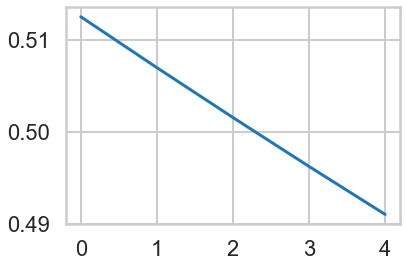

In [671]:
plt.plot(cost)

#### Predict the quantitative response y on the train set

In [672]:
pred_train = y_hat(x_train,w)
R2 = r2_score(y_train,pred_train)*100
R2

9.394276325657602

> The train set has a 9.39% prediction accuracy.

In [673]:
mean_squared_error(y_train,pred_train)

0.8958400888347273

In [674]:
mean_absolute_error(y_train, pred_train)

0.7624319284941447

####  Predictive VS Actual Train set

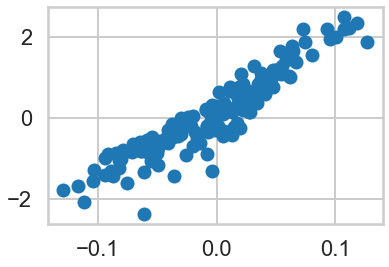

In [697]:
plt.scatter(pred_train, y_train)

#### Equating previous equation

In [676]:
x = X*np.std(x_train)+np.mean(x_train)
x

,Newspaper,Radio,Sales,TV,bias
1,1.687566,1.000385,NaN,1.029585,NaN
2,0.632429,1.101991,NaN,-1.116769,NaN
3,1.691944,1.549057,NaN,-1.432477,NaN
4,1.219102,1.237466,NaN,0.120623,NaN
5,1.214724,-0.828522,NaN,0.459460,NaN
...,...,...,...,...,...
196,-0.737937,-1.309457,NaN,-1.189625,NaN
197,-0.987492,-1.228173,NaN,-0.542018,NaN
198,-1.061921,-0.930128,NaN,0.415515,NaN
199,1.556221,1.284882,NaN,1.648281,NaN


#### Predict the quantitative response y on the test set

In [677]:
pred_test = y_hat(x_test,w)
R2 = r2_score(y_test,pred_test)*100
R2

7.839656184960864

> The test set has a 7.8% prediction accuracy.

In [678]:
mean_squared_error(y_test,pred_test)

0.9202723727592267

In [679]:
mean_absolute_error(y_test, pred_test)

0.8297603598601618

####  Predictive VS Actual Test set

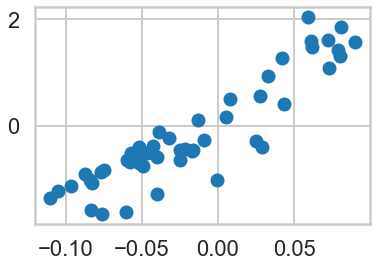

In [695]:
plt.scatter(pred_test,y_test)

#### Equating previous equation

In [681]:
x = X*np.std(x_test)+np.mean(x_test)
x

,Newspaper,Radio,Sales,TV,bias
1,2.030534,0.923398,NaN,0.762753,NaN
2,0.772542,1.023563,NaN,-1.404753,NaN
3,2.035754,1.464288,NaN,-1.723573,NaN
4,1.472006,1.157116,NaN,-0.155167,NaN
5,1.466787,-0.879570,NaN,0.187009,NaN
...,...,...,...,...,...
196,-0.861283,-1.353684,NaN,-1.478327,NaN
197,-1.158816,-1.273552,NaN,-0.824338,NaN
198,-1.247554,-0.979735,NaN,0.142631,NaN
199,1.873938,1.203860,NaN,1.387546,NaN


>> Observation: The cost result is affected by the number of iteration and the value of the
learning rate. As the iteration gets bigger its coefficient of determination is getting higher
and its mean squared error decreases. However, changes in alpha only affect the value of cost but
it doesn't affect the coefficient of deterination and the mean squared error. 

#### Comparing cost functions and iteration with respect to its learning rate

In [690]:
w, cost0 = grad_descent(init_w, x_test, y_test, 2500, 0.01)
w, cost1 = grad_descent(init_w, x_test, y_test, 2500, 0.0001)
w, cost2 = grad_descent(init_w, x_test, y_test, 2500, 0.8)

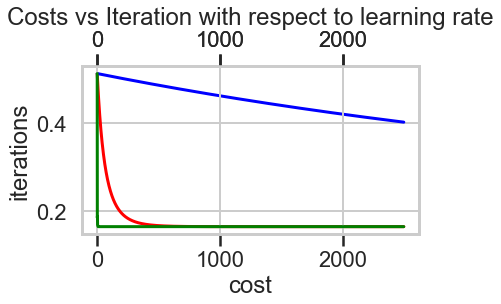

In [692]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
plt.xlabel("cost")
plt.ylabel("iterations")
ax1.plot(cost0, color='red')
ax2 = ax1.twiny()
ax2.plot(cost1, color='blue')
ax3 = ax1.twiny()
ax3.plot(cost2, color='green')
fig.tight_layout()
plt.title("Costs vs Iteration with respect to learning rate")
plt.show()